In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham (4).csv


In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler



dataSet = df = pd.read_csv('framingham.csv')

X=dataSet.drop(['education','TenYearCHD'], axis=1) #Drop 'education' as it is not an important feature for the prediction
y=dataSet['TenYearCHD']

#Replace all the missing values with mean and store it in X_clean
X_clean=X
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
si.fit(X[['BPMeds']])
pd.DataFrame(si.transform(X[['BPMeds']]))
si2=SimpleImputer(strategy='median')
si2.fit(X)
X_clean=pd.DataFrame(si2.transform(X_clean))
X_clean.isnull().sum()


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_clean,y,test_size=0.3,random_state=0)

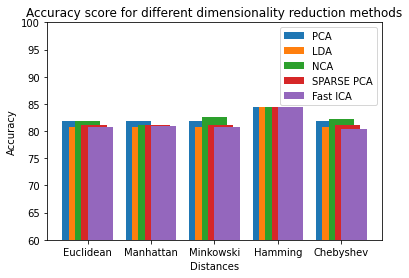

In [103]:
#KNN sci-kit approach




import matplotlib.pyplot as plt

knnvalues=[]
pcavalues=[]
ldavalues=[]
ncavalues=[]
sparsepcavalues=[]
ficavalues=[]

#initialize model

distances=[("Euclidean Distance",'euclidean'),("Manhattan Distance",'manhattan'),("Minsowski Distance",'minkowski'),("Hamming Distance",'hamming'),("Chebyshev Distance",'chebyshev')]

for i, (dname, dtype) in enumerate(distances):
  
  knn = KNeighborsClassifier(n_neighbors = 3, metric = dtype)




  pca = make_pipeline(StandardScaler(), PCA(n_components=2))
  lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=1))
  nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(n_components=2),
)
  sparsePCA=SparsePCA(n_components=2)
  fica=FastICA(n_components=2)

  dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca), ("SPARSEPCA", sparsePCA), ("Fast ICA", fica)]


  for i, (name, model) in enumerate(dim_reduction_methods):

    model.fit(X_train,y_train)
#fit model
    knn.fit(model.transform(X_train), y_train)

# prediction = knn.predict(x_test)
    knn_pred = knn.predict(model.transform(X_test))


# checing the accuracy of the model acc= (true pos + true negative)/total
    acc = accuracy_score(y_test, knn_pred)
    
    if(name=="PCA"):
      pcavalues.append(round(acc,3)*100)
    if(name=="LDA"):
      ldavalues.append(round(acc,3)*100)
    if(name=="NCA"):
      ncavalues.append(round(acc,3)*100)
    if(name=="SPARSEPCA"):
      sparsepcavalues.append(round(acc,3)*100)
    if(name=="Fast ICA"):
      ficavalues.append(round(acc,3)*100)
    
    
X = ['Euclidean','Manhattan','Minkowski','Hamming', 'Chebyshev']

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, pcavalues, 0.4, label = 'PCA')
plt.bar(X_axis - 0.1, ldavalues, 0.4, label = 'LDA')
plt.bar(X_axis  - 0.0, ncavalues, 0.4, label = 'NCA')
plt.bar(X_axis + 0.1, sparsepcavalues, 0.4, label = 'SPARSE PCA')
plt.bar(X_axis + 0.2, ficavalues, 0.4, label = 'Fast ICA')
  
plt.xticks(X_axis, X)
plt.xlabel("Distances")
plt.ylabel("Accuracy")
plt.title("Accuracy score for different dimensionality reduction methods")
plt.ylim([60,100])
plt.legend()
plt.show()




In [104]:
distances=['euclidean','manhattan','minkowski','hamming','chebyshev']
accuracy_knn_scikit=[]

for i, dtype in enumerate(distances):
  knn = KNeighborsClassifier(n_neighbors = 2, metric = dtype)
  knn.fit(X_train,y_train)
  accuracy_knn_scikit.append(accuracy_score(y_test,knn.predict(X_test))*100)
  y_pred_original=knn.predict(X_test)



(3390, 15) (848, 15)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Accuracy on test set by our model       :   83.72641509433963
Accuracy on test set by our model       :   83.72641509433963
Accuracy on test set by our model       :   83.72641509433963
Accuracy on test set by our model       :   83.60849056603774
Accuracy on test set by our model       :   83.72641509433963


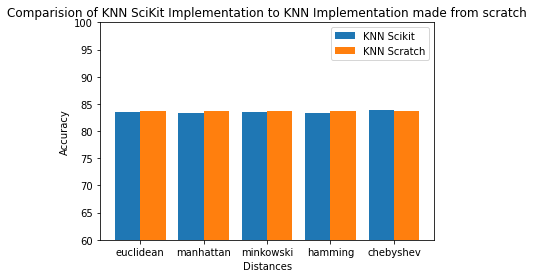

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



̲C̲l̲a̲s̲s̲i̲f̲i̲c̲a̲t̲i̲o̲n̲ ̲R̲e̲p̲o̲r̲t̲
 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       710
           1       0.00      0.00      0.00       138

    accuracy                           0.84       848
   macro avg       0.42      0.50      0.46       848
weighted avg       0.70      0.84      0.76       848



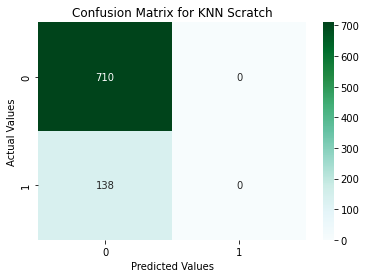

array([[710,   0],
       [138,   0]])

In [106]:

#KNN Classifier implementation from scratch
from scipy.stats import mode
def euclidean( self, x, x_train ) :
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) )



class K_Nearest_Neighbors_Classifier() : 
      
    def __init__( self, K ) :
          
        self.K = K
          
    # Function to store training set
          
    def fit( self, X_train, Y_train ) :
          
        self.X_train = X_train
          
        self.Y_train = Y_train
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X_train.shape
      
    # Function for prediction
          
    def predict_euc( self, X_test ) :
      self.X_test = X_test
  
      # no_of_test_examples, no_of_features
        
      self.m_test, self.n = X_test.shape
        
      # initialize Y_predict
        
      Y_predict = np.zeros( self.m_test )
      print(type(X_test))
      for i in range(self.m_test) :
        x = self.X_test[i]
          
        # find the K nearest neighbors from current test example
          
        neighbors = np.zeros( self.K )
          
        neighbors = self.find_neighbors( x )
          
        # most frequent class in K neighbors
          
        Y_predict[i] = mode( neighbors )[0][0]   
          
        return Y_predict

    def predict_manhattan( self, X_test ) :
      self.X_test = X_test
  
      # no_of_test_examples, no_of_features
        
      self.m_test, self.n = X_test.shape
        
      # initialize Y_predict
        
      Y_predict = np.zeros( self.m_test )
      print(type(X_test))
      for i in range(self.m_test) :
        x = self.X_test[i]
          
        # find the K nearest neighbors from current test example
          
        neighbors = np.zeros( self.K )
          
        neighbors = self.find_neighbors_manhattan( x )
          
        # most frequent class in K neighbors
          
        Y_predict[i] = mode( neighbors )[0][0]   
          
        return Y_predict

    def predict_hamming( self, X_test ) :
      self.X_test = X_test
  
      # no_of_test_examples, no_of_features
        
      self.m_test, self.n = X_test.shape
        
      # initialize Y_predict
        
      Y_predict = np.zeros( self.m_test )
      print(type(X_test))
      for i in range(self.m_test) :
        x = self.X_test[i]
          
        # find the K nearest neighbors from current test example
          
        neighbors = np.zeros( self.K )
          
        neighbors = self.find_neighbors_hamming( x )
          
        # most frequent class in K neighbors
          
        Y_predict[i] = mode( neighbors )[0][0]   
          
        return Y_predict
      
    def predict_chebyshev( self, X_test ) :
      self.X_test = X_test
  
      # no_of_test_examples, no_of_features
        
      self.m_test, self.n = X_test.shape
        
      # initialize Y_predict
        
      Y_predict = np.zeros( self.m_test )
      print(type(X_test))
      for i in range(self.m_test) :
        x = self.X_test[i]
          
        # find the K nearest neighbors from current test example
          
        neighbors = np.zeros( self.K )
          
        neighbors = self.find_neighbors_chebyshev( x )
          
        # most frequent class in K neighbors
          
        Y_predict[i] = mode( neighbors )[0][0]   
          
        return Y_predict
    def predict_minkowski( self, X_test ) :
      self.X_test = X_test
  
      # no_of_test_examples, no_of_features
        
      self.m_test, self.n = X_test.shape
        
      # initialize Y_predict
        
      Y_predict = np.zeros( self.m_test )
      print(type(X_test))
      for i in range(self.m_test) :
        x = self.X_test[i]
          
        # find the K nearest neighbors from current test example
          
        neighbors = np.zeros( self.K )
          
        neighbors = self.find_neighbors_minkowski( x )
          
        # most frequent class in K neighbors
          
        Y_predict[i] = mode( neighbors )[0][0]   
          
        return Y_predict

    # Function to find the K nearest neighbors to current test example
            
    def find_neighbors( self, x ) :
          
        # calculate all the euclidean distances between current 
        # test example x and training set X_train
          
        euclidean_distances = np.zeros( self.m )
          
        for i in range( self.m ) :
              
            d = self.euclidean( x, self.X_train[i] )
              
            euclidean_distances[i] = d
          
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted
          
        inds = euclidean_distances.argsort()
          
        Y_train_sorted = self.Y_train[inds]
          
        return Y_train_sorted[:self.K]

    def find_neighbors_manhattan( self, x ) :
          
        # calculate all the euclidean distances between current 
        # test example x and training set X_train
          
        manhattan_distances = np.zeros( self.m )
          
        for i in range( self.m ) :
              
            d = self.manhattan( x, self.X_train[i] )
              
            manhattan_distances[i] = d
          
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted
          
        inds = manhattan_distances.argsort()
          
        Y_train_sorted = self.Y_train[inds]
          
        return Y_train_sorted[:self.K]

    def find_neighbors_hamming( self, x ) :
          
        # calculate all the euclidean distances between current 
        # test example x and training set X_train
          
        hamming_distances = np.zeros( self.m )
          
        for i in range( self.m ) :
              
            d = self.hamming( x, self.X_train[i] )
              
            hamming_distances[i] = d
          
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted
          
        inds = hamming_distances.argsort()
          
        Y_train_sorted = self.Y_train[inds]
          
        return Y_train_sorted[:self.K]

    def find_neighbors_minkowski( self, x ) :
          
        # calculate all the euclidean distances between current 
        # test example x and training set X_train
          
        minkowski_distances = np.zeros( self.m )
          
        for i in range( self.m ) :
              
            d = self.minkowski( x, self.X_train[i] )
              
            minkowski_distances[i] = d
          
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted
          
        inds = minkowski_distances.argsort()
          
        Y_train_sorted = self.Y_train[inds]
          
        return Y_train_sorted[:self.K]
    
    def find_neighbors_chebyshev( self, x ) :
          
        # calculate all the euclidean distances between current 
        # test example x and training set X_train
          
        chebyshev_distances = np.zeros( self.m )
          
        for i in range( self.m ) :
              
            d = self.chebyshev( x, self.X_train[i] )
              
            chebyshev_distances[i] = d
          
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted
          
        inds = chebyshev_distances.argsort()
          
        Y_train_sorted = self.Y_train[inds]
          
        return Y_train_sorted[:self.K]
    # Functions to calculate distances
              
    def euclidean( self, x, x_train ) :
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) )
    def manhattan (self, x, x_train):
      return np.sum(np.abs(x-x_train))
    def hamming (self , x, x_train):
      return np.sum(x*x_train)/(np.sum(x*x)*np.sum(x_train*x_train))
    def minkowski (self, x, x_train):
      return np.sum(np.square(x-x_train))
    def chebyshev(self, x, x_train):
      return max(abs(e1-e2) for e1, e2 in zip(x,x_train))

    

df = pd.read_csv( "framingham.csv" )  
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1:].values
  
# Splitting dataset into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( 
  X, Y, test_size =0.2 , random_state = 0 )



model = K_Nearest_Neighbors_Classifier( K = 3 )
model.fit( X_train, y_train )

print(X_train.shape, X_test.shape)

Y_pred = model.predict_euc(X_test)
Y_pred_manhattan=model.predict_manhattan(X_test)
Y_pred_hamming=model.predict_hamming(X_test)
Y_pred_minkowski=model.predict_minkowski(X_test)
Y_pred_chebyshev=model.predict_chebyshev(X_test)


def verify(pred):
  count = 0
  correctly_classified = 0

  for count in range( np.size( pred ) ) :
          
    if y_test[count] == pred[count] :         
      correctly_classified = correctly_classified + 1
          
              
    count = count + 1

          
  print( "Accuracy on test set by our model       :  ", ( 
  correctly_classified / count ) * 100 )
  return (correctly_classified / count ) * 100



accuracy_knn_scratch=[]



accuracy_knn_scratch.append(verify(Y_pred))
accuracy_knn_scratch.append(verify(Y_pred_manhattan))
accuracy_knn_scratch.append(verify(Y_pred_minkowski))
accuracy_knn_scratch.append(verify(Y_pred_hamming))
accuracy_knn_scratch.append(verify(Y_pred_chebyshev))


X_axis = np.arange(len(distances))
plt.bar(X_axis - 0.2, accuracy_knn_scikit, 0.4, label = 'KNN Scikit')
plt.bar(X_axis + 0.2, accuracy_knn_scratch, 0.4, label = 'KNN Scratch')

  
plt.xticks(X_axis, distances)
plt.xlabel("Distances")
plt.ylabel("Accuracy")
plt.title("Comparision of KNN SciKit Implementation to KNN Implementation made from scratch")
plt.ylim([60,100])
plt.legend()
plt.show()

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test, y_pred, plt_title):
    c_m=confusion_matrix(y_test, y_pred)
    print("\u0332".join('\nClassification Report\n'),'\n', classification_report(y_test, y_pred))
    sns.heatmap(c_m, fmt='g', annot=True, cmap='BuGn')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return c_m

plot_confusion_matrix(y_test,Y_pred, "Confusion Matrix for KNN Scratch")


In [105]:
# f1 score: Tweighted average of the precision and recall, best is 1 and worst is 0.
f1 = f1_score(y_test, knn_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: how many correct and false positives does the result show? precision=True positive/predicted yes
precision = precision_score(y_test, knn_pred, zero_division=0)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: true positive rate(Sensitivity or Recall): true positive rate = true positive/actual yes
recall = recall_score(y_test, knn_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")



X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X = pd.DataFrame(X)
y = pd.DataFrame(y)


The f1 score for KNN is: 15.0%
The precision score for KNN is: 23.200000000000003%
The recall score for KNN is: 11.1%


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


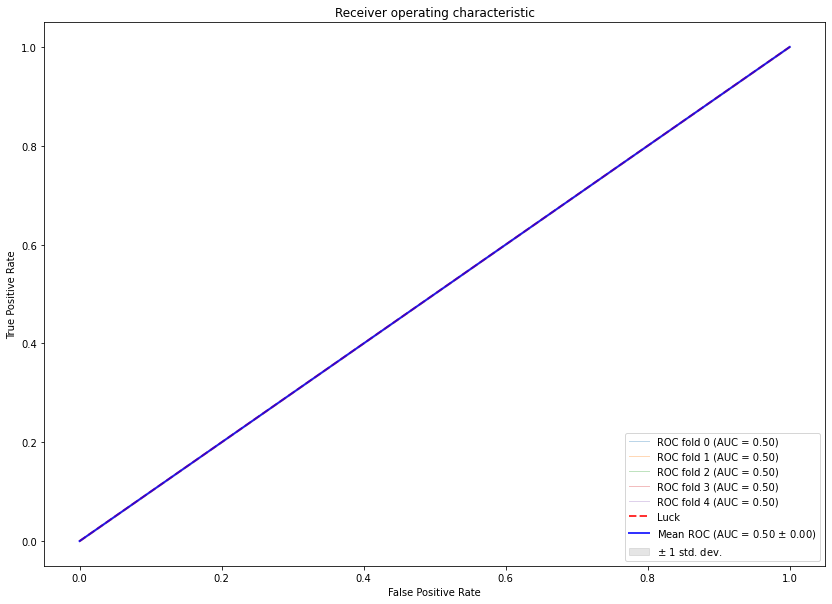

,AUC Train,AUC Test
0,0.5,0.5
1,0.5,0.5
2,0.5,0.5
3,0.5,0.5
4,0.5,0.5


In [59]:
#K Fold validation for KNNN
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = model.predict_euc(np.squeeze(np.asarray(X.iloc[index])))
    fpr, tpr, thresholds = roc_curve(np.squeeze(np.asarray(y.iloc[index])), y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score



cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X,y), range(5)):
    model.fit(np.squeeze(np.asarray(X.iloc[train])), np.squeeze(np.asarray(y.iloc[train])))
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
